In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import copy
%matplotlib inline

In [2]:
sns.__version__

'0.11.0'

Goal: Create a simulation that can track ladder matches and carry out millions of them.  

In [2]:
def chanceOfOverlvl(lvlDiff):
        return 0.0186*lvlDiff + 0.521 #From 90k games

In [40]:
#Create the data frame: Track 7 things: 
cols = ['Trophies', 'King Level', 'Card Level', 'Wins', 'Losses', 'Opponent Levels Sum', 'Total Matches']

In [14]:
kingLvls = [random.choice(range(8, 14)) for i in range(13)]

In [15]:
print(kingLvls.count(8))
print(kingLvls.count(9))
print(kingLvls.count(10))
print(kingLvls.count(11))
print(kingLvls.count(12))
print(kingLvls.count(13))

24953
25029
25079
24964
25036
24939


In [16]:
24954/150000

0.16636

# King level and card level are generally correlated.  
72 deck levels is level 9, increasing king level results in the card level increasing. Level 8 king towers have total card level between 60 and 80.   The widest range is level 10 since there is the greatest variation between card levels between level 10's.  

## Level 8: 
    60 - 80
## Level 9:
    68-88
## Level 10:
    76-104
## Level 11:
    84-104
## Level 12:
    92-104
## Level 13:
    96-104

In [20]:
levels = [deckLevel(e) for e in kingLvls]

In [406]:
def deckLevel(kingLvl):
    """gives the deck levels corresponding to the king level guidelines above"""
    if kingLvl == 8:
        return random.choice(range(60, 81))
    elif kingLvl == 9:
        return random.choice(range(68, 89))
    elif kingLvl == 10:
        return random.choice(range(76, 105))
    elif kingLvl == 11:
        return random.choice(range(84, 105))
    elif kingLvl == 12:
        return random.choice(range(92, 105))
    elif kingLvl == 13:
        return random.choice(range(96, 105))
    else:
        return 'King Level out of Range'

In [183]:
def createDataFrame(sampleSize, startingTrophies):
    """Sample Size is the number of players involved in the sample.
    Starting Trophies is the amount that each player starts at"""
    data = []
    for player in range(sampleSize):
        kingLvl = random.choice(range(8, 14))
        cardLevel = deckLevel(kingLvl)
        data.append([startingTrophies, kingLvl, cardLevel, 0, 0, 0, 0])
    df = pd.DataFrame(data, columns = cols)
    return df


    

In [184]:
df = createDataFrame(15, 5400)

In [185]:
df.head(15)

,Trophies,King Level,Card Level,Wins,Losses,Opp. Levels Sum,Total Matches
0,5400,8,69,0,0,0,0
1,5400,8,60,0,0,0,0
2,5400,10,83,0,0,0,0
3,5400,11,84,0,0,0,0
4,5400,8,70,0,0,0,0
5,5400,8,62,0,0,0,0
6,5400,13,97,0,0,0,0
7,5400,10,93,0,0,0,0
8,5400,9,85,0,0,0,0
9,5400,13,100,0,0,0,0


In [56]:
def lossPercent(trophies):
    if 4000 <= trophies < 5000:
        return 1
    
    elif 5000 <= trophies < 5300:
        return 0.8
    elif 5300 <= trophies < 6000:
        return 0.9
    else: 
        return 1

In [395]:
def match(a, b, df):
    """a and b are player numbers, df has the data on them"""
    alvls = df['Card Level'][a] + df['King Level'][a]
    blvls = df['Card Level'][b] + df['King Level'][b]
    if  alvls > blvls:
        if random.random() < chanceOfOverlvl(alvls -blvls):
            updateSimDF(a, b, a, df)
        else:
            updateSimDF(a, b, b, df)
    elif blvls > alvls:
        if random.random() < chanceOfOverlvl(blvls - alvls):
            updateSimDF(a, b, b, df)
        else:
            updateSimDF(a, b, a, df)
    else: #equal lvls:
        if random.random() > 0.5:
            updateSimDF(a, b, b, df)
        else:
            updateSimDF(a, b, a, df)
    return df

In [175]:
def updateSimDF(a, b, winner, df):
    """updates the data frame with teh same trophy win/loss algorithm as in game"""
    trophyA = df['Trophies'][a]
    trophyB = df['Trophies'][b]
    if trophyA > trophyB:
        if winner == a:
            df.loc[a, 'Trophies'] += 30 -(round((trophyA - trophyB)/12))
            df.loc[b, 'Trophies'] += -30 +int((round((trophyA - trophyB)/12))*lossPercent(trophyB))
            df.loc[a, 'Wins'] += 1
            df.loc[b, 'Losses'] += 1
            df.loc[a, 'Total Matches'] += 1
            df.loc[b, 'Total Matches'] += 1
            df.loc[a, 'Opponent Levels Sum'] += df["Card Level"][b]
            df.loc[b, 'Opponent Levels Sum'] += df["Card Level"][a]
            if df['Trophies'][b] < 5000:
                df.loc[b, 'Trophies'] = 5000
        elif winner == b:
            df.loc[b, 'Trophies'] += 30 + (round((trophyA - trophyB)/12))
            df.loc[a, 'Trophies'] += -30 - int((round((trophyA - trophyB)/12))*lossPercent(trophyA))
            df.loc[b, 'Wins'] += 1
            df.loc[a, 'Losses'] += 1
            df.loc[a, 'Total Matches'] += 1
            df.loc[b, 'Total Matches'] += 1
            df.loc[a, 'Opponent Levels Sum'] += df["Card Level"][b]
            df.loc[b, 'Opponent Levels Sum'] += df["Card Level"][a]
            if df['Trophies'][a] < 5000:
                df.loc[a, 'Trophies'] = 5000
    elif trophyA < trophyB:
        if winner == a:
            df.loc[a, 'Trophies'] += 30 + (round((trophyA - trophyB)/12))
            df.loc[b, 'Trophies'] += -30 - int((round((trophyA - trophyB)/12))*lossPercent(trophyB))
            df.loc[a, 'Wins'] += 1
            df.loc[b, 'Losses'] += 1
            df.loc[a, 'Total Matches'] += 1
            df.loc[b, 'Total Matches'] += 1
            df.loc[a, 'Opponent Levels Sum'] += df["Card Level"][b]
            df.loc[b, 'Opponent Levels Sum'] += df["Card Level"][a]
            if df['Trophies'][b] < 5000:
                df.loc[b, 'Trophies'] = 5000
        elif winner == b:
            df.loc[b, 'Trophies'] += 30 + (round((trophyA - trophyB)/12))
            df.loc[a,'Trophies'] += -30 - int((round((trophyA - trophyB)/12))*lossPercent(trophyA))
            df.loc[b, 'Wins'] += 1
            df.loc[a, 'Losses'] += 1
            df.loc[a, 'Total Matches'] += 1
            df.loc[b, 'Total Matches'] += 1
            df.loc[a, 'Opponent Levels Sum'] += df["Card Level"][b]
            df.loc[b, 'Opponent Levels Sum'] += df["Card Level"][a]
            if df['Trophies'][a] < 5000:
                df.loc[a, 'Trophies'] = 5000
    else: #equal trophies
        if winner == a:
            df.loc[a, 'Trophies'] += 30 
            df.loc[b, 'Trophies'] += -30*lossPercent(trophyB)
            df.loc[a, 'Wins'] += 1
            df.loc[b, 'Losses'] += 1
            df.loc[a, 'Total Matches'] += 1
            df.loc[b, 'Total Matches'] += 1
            df.loc[a, 'Opponent Levels Sum'] += df["Card Level"][b]
            df.loc[b, 'Opponent Levels Sum'] += df["Card Level"][a]
            if df['Trophies'][b] < 5000:
                df.loc[b, 'Trophies'] = 5000
        elif winner == b:
            df.loc[b, 'Trophies'] += 30 
            df.loc[a,'Trophies'] += -30 *lossPercent(trophyA)
            df.loc[b, 'Wins'] += 1
            df.loc[a, 'Losses'] += 1
            df.loc[a, 'Total Matches'] += 1
            df.loc[b, 'Total Matches'] += 1
            df.loc[a, 'Opponent Levels Sum'] += df["Card Level"][b]
            df.loc[b, 'Opponent Levels Sum'] += df["Card Level"][a]
            if df['Trophies'][a] < 5000:
                df.loc[a, 'Trophies'] = 5000

In [176]:
updateSimDF(6, 7, 0, df)

In [177]:
df

,Trophies,King Level,Card Level,Wins,Losses
0,5400.0,10,84,0,0
1,5400.0,8,66,0,0
2,5400.0,9,71,0,0
3,5400.0,12,94,0,0
4,5476.0,13,98,3,0
5,5300.0,11,85,0,4
6,5366.0,11,96,1,2
7,5437.0,8,79,2,1
8,5400.0,13,103,0,0
9,5400.0,13,98,0,0


In [246]:
def matchAllowedTrophies(a, b, df):
    """if the two players are too far apart in trophies, then the match doesn't happen"""
    if abs(df['Trophies'][a] - df['Trophies'][b]) < 32:
        return True
    else:
        return False

In [67]:
def matchAllowedKingLvl(a, b, df):
    """if the two players are too far apart in trophies, then the match doesn't happen"""
    if abs(df['King Level'][a] - df['King Level'][b]) < 2:
        return True
    else:
        return False

In [71]:
def matchAllowedCardLvl(a, b, df):
    """if the two players are too far apart in trophies, then the match doesn't happen"""
    if abs(df['Card Level'][a] - df['Card Level'][b]) < 3:
        return True
    else:
        return False

In [73]:
matchAllowedCardLvl(6,14, df)

False

In [358]:
def sim(sampleSize, numMatches, startingTrophies, KLMM, CLMM):
    """runs a simulation with sampleSize players playing numMatches games.
    starting Trophies is where all the players start at.  
    KLMM is if king level mm is in place.  For simplicity, KLMM will match +-1 level only
    CLMM is if card level mm is in place.  Card levels are +- 4 (1/2 a level)
    """
    df = createDataFrame(sampleSize, startingTrophies)
    matches = 0
    failed = 0
    while matches < numMatches:
        seed = random.choice(range(sampleSize))
        players = list(range(sampleSize))
        players.remove(seed)
        #print(matches)
        if failed > 10: #after 10 failed mm attempts, the loop breaks
            break
        if KLMM == False and CLMM == False:
            #Only trophies are considered
            playerSet = [opponent for opponent in players if matchAllowedTrophies(seed, opponent, df) == True]
            playerSet += [seed]
            if len(playerSet) <2:
                failed += 1
            random.shuffle(playerSet)
            for i in range(len(playerSet)//2):
                    match((playerSet[2*i]), playerSet[2*i +1], df)
                    #print(playerSet[2*i], playerSet[2*i +1])
                    matches += 1
                    failed = 0
        elif KLMM == False and CLMM == True:
            #Trophies and card levels are considered
            playerSet = [opponent for opponent in players if matchAllowedTrophies(seed, opponent, df) == True]
            finalSet = [opponent for opponent in playerSet if matchAllowedCardLvl(seed, opponent, df) == True]
            finalSet += [seed]
            random.shuffle(finalSet)
            if len(finalSet) < 2:
                failed += 1
            for i in range(len(finalSet)//2):
                match((finalSet[2*i]), finalSet[2*i +1], df)
                matches += 1
                failed = 0

        elif KLMM == True and CLMM == False:
            #Trophies and King levels are considered 
            playerSet = [opponent for opponent in players if matchAllowedTrophies(seed, opponent, df) == True]
            random.shuffle(playerSet)
            playerSet += [seed]
            if len(playerSet) <2:
                failed += 1
            for i in range(len(playerSet)//2):
                matching = playerSet[2*i],playerSet[2*i +1]
                if df['Trophies'][matching[0]] >= 6000: #The match will ALWAYS happen
                    match(matching[0], matching[1], df)
                    matches += 1
                    failed = 0
                elif matchAllowedKingLvl(matching[0], matching[1], df) == True:
                    match(matching[0], matching[1], df)
                    matches += 1
                    failed = 0
        elif KLMM == True and CLMM == True:
            playerSet = [opponent for opponent in players if matchAllowedTrophies(seed, opponent, df) == True]
            finalSet = [opponent for opponent in playerSet if matchAllowedCardLvl(seed, opponent, df) == True]
            random.shuffle(finalSet)
            finalSet += [seed]
            if len(finalSet) < 2:
                failed += 1
            for i in range(len(finalSet)//2):
                matching = playerSet[2*i],playerSet[2*i +1]
                if df['Trophies'][matching[0]] >= 6000: #The match will ALWAYS happen
                    match(matching[0], matching[1], df)
                    matches += 1
                    failed = 0
                elif matchAllowedKingLvl(matching[0], matching[1], df) == True:
                    match(matching[0], matching[1], df)
                    matches += 1
                    failed = 0
        else:
            return 'Invalid KLMM/CLMM input'
    print(f"{matches} Matches Finished")
    
    return df
        
    
    

In [359]:
sim(1500, 100, 5400, True, False)

308 Matches Finished


,Trophies,King Level,Card Level,Wins,Losses,Opponent Levels Sum,Total Matches
0,5400.0,11,93,0,0,0,0
1,5373.0,9,68,0,1,82,1
2,5373.0,8,64,0,1,77,1
3,5373.0,8,67,0,1,77,1
4,5373.0,9,76,0,1,68,1
...,...,...,...,...,...,...,...
1495,5400.0,11,93,0,0,0,0
1496,5373.0,11,91,0,1,100,1
1497,5400.0,11,99,0,0,0,0
1498,5373.0,12,96,0,1,99,1


In [360]:
df = _

In [361]:
df

,Trophies,King Level,Card Level,Wins,Losses,Opponent Levels Sum,Total Matches
0,5400.0,11,93,0,0,0,0
1,5373.0,9,68,0,1,82,1
2,5373.0,8,64,0,1,77,1
3,5373.0,8,67,0,1,77,1
4,5373.0,9,76,0,1,68,1
...,...,...,...,...,...,...,...
1495,5400.0,11,93,0,0,0,0
1496,5373.0,11,91,0,1,100,1
1497,5400.0,11,99,0,0,0,0
1498,5373.0,12,96,0,1,99,1


In [355]:
def continueSim(df, numMatches, KLMM, CLMM):
    """continues a simulation for numMatches more matches"""
    sampleSize = df.shape[0] #number of players
    matches = 0
    failed = 0 
    while matches < numMatches:
        seed = random.choice(range(sampleSize))
        players = list(range(sampleSize))
        players.remove(seed)
        #print(matches)
        if failed > 10: #after 10 failed mm attempts, the loop breaks
            break
        if KLMM == False and CLMM == False:
            #Only trophies are considered
            playerSet = [opponent for opponent in players if matchAllowedTrophies(seed, opponent, df) == True]
            playerSet += [seed]
            if len(playerSet) <2:
                failed += 1
            random.shuffle(playerSet)
            for i in range(len(playerSet)//2):
                    match((playerSet[2*i]), playerSet[2*i +1], df)
                    #print(playerSet[2*i], playerSet[2*i +1])
                    matches += 1
                    failed = 0
        elif KLMM == False and CLMM == True:
            #Trophies and card levels are considered
            playerSet = [opponent for opponent in players if matchAllowedTrophies(seed, opponent, df) == True]
            finalSet = [opponent for opponent in playerSet if matchAllowedCardLvl(seed, opponent, df) == True]
            finalSet += [seed]
            random.shuffle(finalSet)
            if len(finalSet) < 2:
                failed += 1
            for i in range(len(finalSet)//2):
                match((finalSet[2*i]), finalSet[2*i +1], df)
                matches += 1
                failed = 0

        elif KLMM == True and CLMM == False:
            #Trophies and King levels are considered 
            playerSet = [opponent for opponent in players if matchAllowedTrophies(seed, opponent, df) == True]
            random.shuffle(playerSet)
            playerSet += [seed]
            if len(playerSet) <2:
                failed += 1
            for i in range(len(playerSet)//2):
                matching = playerSet[2*i],playerSet[2*i +1]
                if df['Trophies'][matching[0]] >= 6000: #The match will ALWAYS happen
                    match(matching[0], matching[1], df)
                    matches += 1
                    failed = 0
                elif matchAllowedKingLvl(matching[0], matching[1], df) == True:
                    match(matching[0], matching[1], df)
                    matches += 1
                    failed = 0
        elif KLMM == True and CLMM == True:
            playerSet = [opponent for opponent in players if matchAllowedTrophies(seed, opponent, df) == True]
            finalSet = [opponent for opponent in playerSet if matchAllowedCardLvl(seed, opponent, df) == True]
            random.shuffle(finalSet)
            finalSet += [seed]
            if len(finalSet) < 2:
                failed += 1
            for i in range(len(finalSet)//2):
                matching = playerSet[2*i],playerSet[2*i +1]
                if df['Trophies'][matching[0]] >= 6000: #The match will ALWAYS happen
                    match(matching[0], matching[1], df)
                    matches += 1
                    failed = 0
                elif matchAllowedKingLvl(matching[0], matching[1], df) == True:
                    match(matching[0], matching[1], df)
                    matches += 1
                    failed = 0
        else:
            return 'Invalid KLMM/CLMM input'
    print(f"{matches} Matches Finished")
    return df

In [353]:
df

,Trophies,King Level,Card Level,Wins,Losses,Total Matches,Win Percent,Opponent Lvl,Lvls Below Opp.
0,5369.0,13,97,2,3,5,0.400000,97.200,0.200
1,5516.0,12,98,4,0,4,1.000000,94.750,-3.250
2,5456.0,11,97,4,2,6,0.666667,97.000,0.000
3,5433.0,11,90,2,1,3,0.666667,90.000,0.000
4,5345.0,13,98,1,3,4,0.250000,98.250,0.250
...,...,...,...,...,...,...,...,...,...
1495,5511.0,10,98,6,2,8,0.750000,87.875,-10.125
1496,5405.0,8,69,3,3,6,0.500000,73.500,4.500
1497,5484.0,12,103,4,1,5,0.800000,99.200,-3.800
1498,5346.0,8,61,1,3,4,0.250000,75.500,14.500


In [350]:
def analyzeDF(df):
    df['Win Percent'] = df['Wins']/(df['Wins'] + df['Losses'])
    df['Opponent Lvl'] = df['Opponent Levels Sum']/df['Total Matches']
    df['Lvls Below Opp.'] = df['Opponent Lvl']-df['Card Level'] #Overleveled if lvlDiff is negative
    df_final = df.drop([cols[5]], axis = 1)
    return df_final

In [370]:
df = continueSim(df2, 100000, True, False)

100008 Matches Finished


In [371]:
df3= analyzeDF(df)

In [372]:
df3.head(15)

,Trophies,King Level,Card Level,Wins,Losses,Total Matches,Win Percent,Opponent Lvl,Lvls Below Opp.
0,5651.0,11,93,169,157,326,0.518405,94.282209,1.282209
1,5207.0,9,68,183,206,389,0.470437,69.221080,1.221080
2,5000.0,8,64,145,181,326,0.444785,66.812883,2.812883
3,5051.0,8,67,169,185,354,0.477401,68.680791,1.680791
4,5072.0,9,76,189,197,386,0.489637,74.917098,-1.082902
5,5410.0,11,91,144,143,287,0.501742,90.428571,-0.571429
6,5141.0,10,84,146,156,302,0.483444,82.791391,-1.208609
7,6014.0,10,98,128,106,234,0.547009,94.850427,-3.149573
8,5308.0,8,73,146,148,294,0.496599,73.472789,0.472789
9,5123.0,13,97,79,91,170,0.464706,96.741176,-0.258824


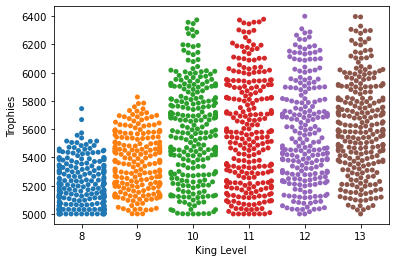

In [373]:
sns.swarmplot(x = 'King Level', y = 'Trophies', data = df3)

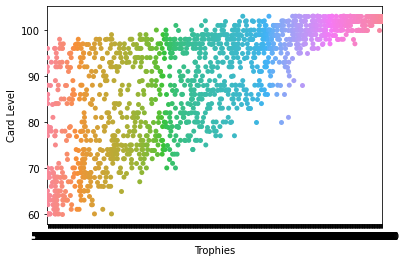

In [374]:
sns.swarmplot(x = 'Trophies', y = 'Card Level', data = df3)

In [271]:
def reset(trophies):
    if trophies >= 7000:
        return min((6600, int(trophies - 0.3*(trophies-5000))))
    elif 6000 <= trophies< 7000:
        return int(trophies - 0.4*(trophies - 5000))
    elif 5000 <= trophies < 6000:
        return int(trophies - 0.5*(trophies - 5000))
    else:
        return trophies #no reset

In [302]:
LC = [[int((100/3)*trophies), reset(int((100/3)*trophies))] for trophies in range(135, 225)]

In [303]:
cupsdf = pd.DataFrame(LC, columns = ['Before Reset', 'After Reset'])

In [304]:
cupsdf

,Before Reset,After Reset
0,4500,4500
1,4533,4533
2,4566,4566
3,4600,4600
4,4633,4633
...,...,...
85,7333,6600
86,7366,6600
87,7400,6600
88,7433,6600


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89]),
 <a list of 90 Text major ticklabel objects>)

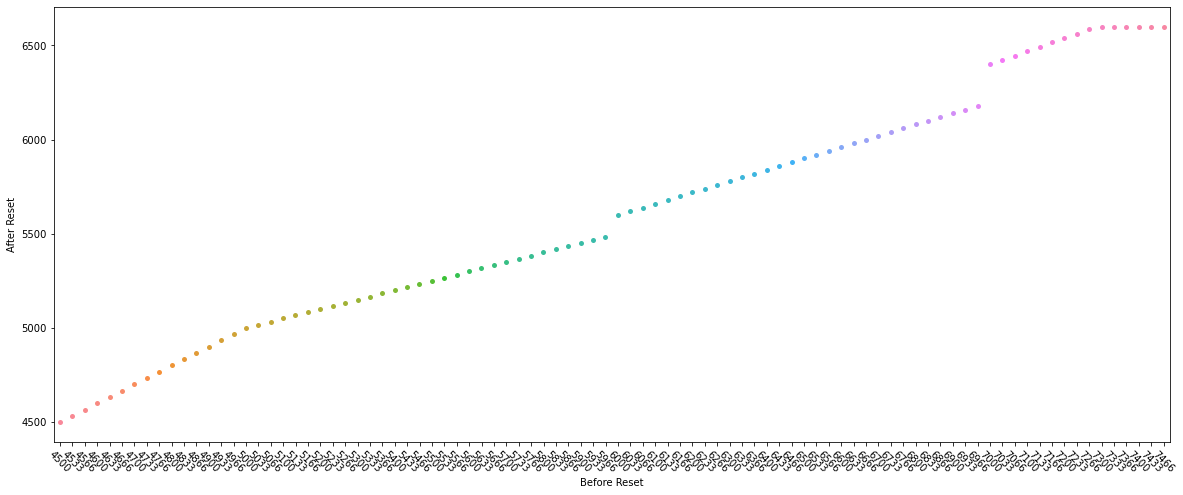

In [305]:
plt.figure(figsize = (20, 8))
sns.swarmplot(x = 'Before Reset', y = 'After Reset', data = cupsdf)
plt.xticks(rotation = -45)

In [397]:
bigdf = sim(20000, 4000000, 5400, False, False)
df2 = analyzeDF(bigdf)

4000221 Matches Finished


In [398]:
bigdf.head()

,Trophies,King Level,Card Level,Wins,Losses,Opponent Levels Sum,Total Matches,Win Percent,Opponent Lvl,Lvls Below Opp.
0,5405.0,11,84,234,231,39443,465,0.503226,84.823656,0.823656
1,5562.0,12,95,213,204,39664,417,0.510791,95.117506,0.117506
2,5178.0,9,77,225,233,35296,458,0.491266,77.065502,0.065502
3,5552.0,10,95,206,198,37425,404,0.509901,92.636139,-2.363861
4,6225.0,11,103,151,122,27168,273,0.553114,99.516484,-3.483516


In [399]:
bigdf['Trophies'].max()

6579.0

In [378]:
dfcopy = bigdf.copy()

In [400]:
trophies = list(df2['Trophies'])

In [401]:
trophies.index(6516)

16071

In [402]:
df2.loc[16071]

Trophies           6516.000000
King Level           13.000000
Card Level          103.000000
Wins                 78.000000
Losses               39.000000
Total Matches       117.000000
Win Percent           0.666667
Opponent Lvl        101.119658
Lvls Below Opp.      -1.880342
Name: 16071, dtype: float64

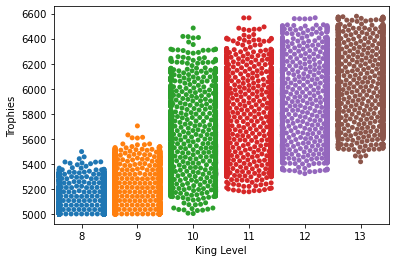

In [403]:
sns.swarmplot(x = 'King Level', y = 'Trophies', data = df2)
plt.xticks(rotation = -45)

In [410]:
bigdf.to_csv('ladderSim2', index_label = False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43]),
 <a list of 44 Text major ticklabel objects>)

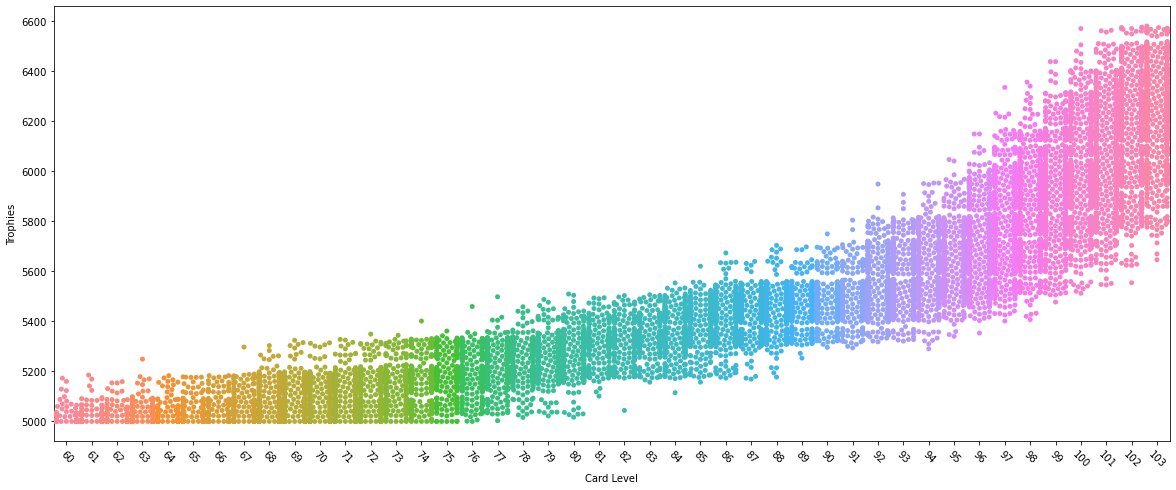

In [405]:
plt.figure(figsize = (20, 8))
sns.swarmplot(x = 'Card Level', y = 'Trophies', data = df2)
plt.xticks(rotation = -45)

In [30]:
axisLabels = [5000, 5200, 5400, 5600, 5800, 6000, 6200, 6400, 6600]

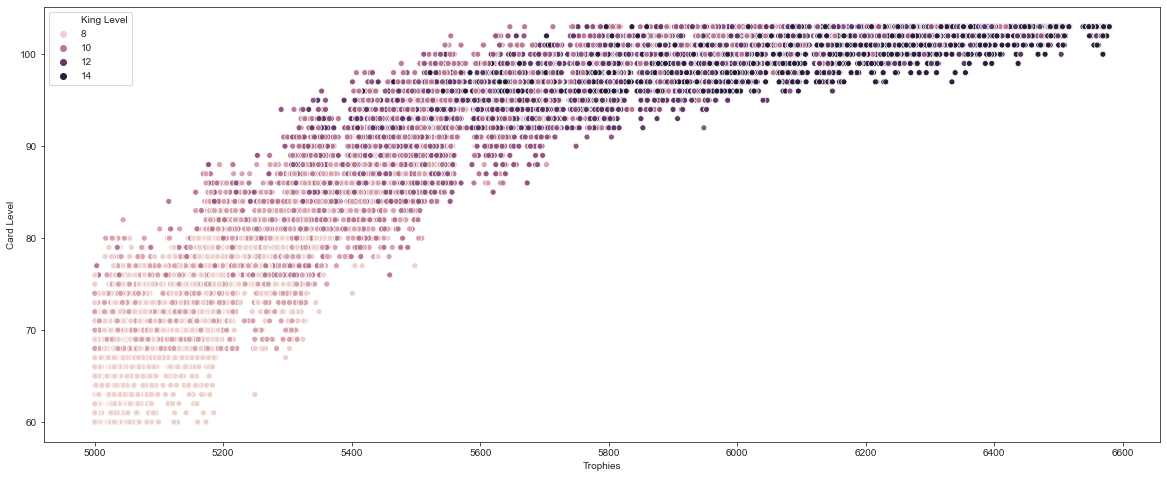

In [35]:
# sns.set_style(style = 'ticks')
# f,ax = plt.subplots(figsize=(20, 8))
# sns.despine(f)
# ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())

# plt.xticks(rotation = -45)
# sns.swarmplot(x = 'Trophies', y = 'Card Level', data = df[:1000])
# ax.set_xticks(axisLabels)
plt.subplots(figsize=(20, 8))
sns.scatterplot(data= df, x = 'Trophies', y = 'Card Level', hue = 'King Level')

In [18]:
df.head()

,Trophies,King Level,Card Level,Wins,Losses,Opponent Levels Sum,Total Matches,Win Percent,Opponent Lvl,Lvls Below Opp.
0,5405.0,11,84,234,231,39443,465,0.503226,84.823656,0.823656
1,5562.0,12,95,213,204,39664,417,0.510791,95.117506,0.117506
2,5178.0,9,77,225,233,35296,458,0.491266,77.065502,0.065502
3,5552.0,10,95,206,198,37425,404,0.509901,92.636139,-2.363861
4,6225.0,11,103,151,122,27168,273,0.553114,99.516484,-3.483516


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171]),
 <a list of 172 Text major

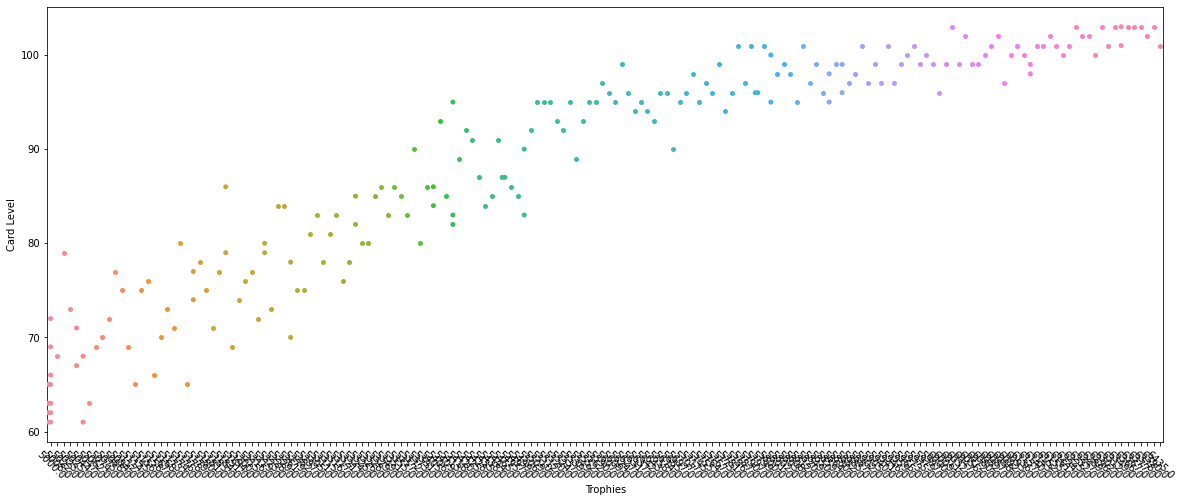

In [409]:
plt.figure(figsize = (20, 8))
sns.swarmplot(x = 'Trophies', y = 'Card Level', data = df3)
plt.xticks(rotation = -45)

In [3]:
diamonds = sns.load_dataset('diamonds')

In [5]:
diamonds.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [4]:
diamonds.shape

(53940, 10)

In [3]:
df = pd.read_csv('LadderSim2')

In [4]:
df.shape

(20000, 10)

In [9]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


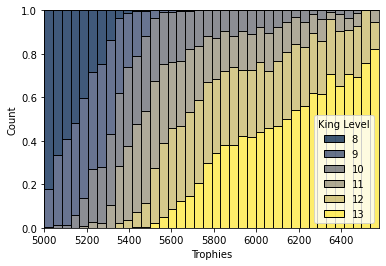

In [13]:

#'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 
#'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 
# 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 
# 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 
# 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 
# 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 
# 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r'
# , 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 
# 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 
# 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar',
# 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot',
# 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 
# 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 
# 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket',

# 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 
# 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight', 'twilight_r', 
# 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'
sns.histplot(data = df, 
             x = 'Trophies', 
             hue = 'King Level', 
             palette = sns.color_palette("cividis", as_cmap=True), 
             multiple = 'fill')
#'layer', 'stack', 'fill', 'dodge'

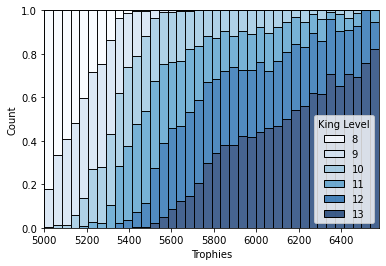

In [31]:
sns.histplot(data = df, 
             x = 'Trophies', 
             #y = 'Trophies', 
             hue = 'King Level',
             palette = sns.color_palette("Blues", as_cmap=True), 
             multiple = 'fill')

C:\Users\RMBut\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


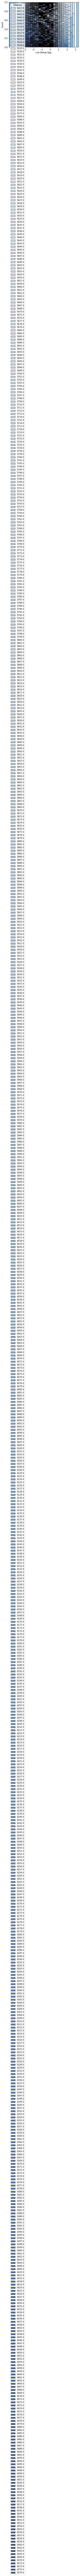

In [40]:
sns.histplot(df13, 
             x = 'Lvls Below Opp.', 
             #y = 'Trophies', 
             hue = 'Trophies',
             palette = sns.color_palette("Blues", as_cmap=True), 
             multiple = 'fill')

In [32]:
df.head()

,Trophies,King Level,Card Level,Wins,Losses,Opponent Levels Sum,Total Matches,Win Percent,Opponent Lvl,Lvls Below Opp.
0,5405.0,11,84,234,231,39443,465,0.503226,84.823656,0.823656
1,5562.0,12,95,213,204,39664,417,0.510791,95.117506,0.117506
2,5178.0,9,77,225,233,35296,458,0.491266,77.065502,0.065502
3,5552.0,10,95,206,198,37425,404,0.509901,92.636139,-2.363861
4,6225.0,11,103,151,122,27168,273,0.553114,99.516484,-3.483516


In [35]:
df8 = df[df['King Level'] == 8]
df9 = df[df['King Level'] == 9]
df10= df[df['King Level'] == 10]
df11 = df[df['King Level'] == 11]
df12 = df[df['King Level'] == 12]
df13 = df[df['King Level'] == 13]


In [36]:
df13.head()

,Trophies,King Level,Card Level,Wins,Losses,Opponent Levels Sum,Total Matches,Win Percent,Opponent Lvl,Lvls Below Opp.
5,6088.0,13,97,202,176,36399,378,0.534392,96.293651,-0.706349
9,6302.0,13,101,142,109,24966,251,0.565737,99.466135,-1.533865
12,5905.0,13,99,161,142,30072,303,0.531353,99.247525,0.247525
17,6378.0,13,102,101,66,16827,167,0.604790,100.760479,-1.239521
27,5864.0,13,99,171,154,32115,325,0.526154,98.815385,-0.184615


In [50]:
df['Trophies'].max()

6579.0

In [51]:
k = list(df['Trophies'])

In [52]:
k.index(6579)

19323

In [54]:
df.loc[19323]

Trophies                6579.000000
King Level                13.000000
Card Level               103.000000
Wins                     104.000000
Losses                    62.000000
Opponent Levels Sum    16767.000000
Total Matches            166.000000
Win Percent                0.626506
Opponent Lvl             101.006024
Lvls Below Opp.           -1.993976
Name: 19323, dtype: float64

In [4]:
plt.figure(figsize = (20, 8))
sns.displot(data = df,
            x = 'Lvls Below Opp.', 
            y = 'Trophies', 
            hue = 'King Level', 
            palette="ch:rot=-.25,hue=1,light=.75")

AttributeError: module 'seaborn' has no attribute 'displot'

<Figure size 1440x576 with 0 Axes>

In [59]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [67]:
df12.head()

,Trophies,King Level,Card Level,Wins,Losses,Opponent Levels Sum,Total Matches,Win Percent,Opponent Lvl,Lvls Below Opp.
1,5562.0,12,95,213,204,39664,417,0.510791,95.117506,0.117506
8,5940.0,12,97,184,163,33610,347,0.530259,96.858790,-0.141210
19,6296.0,12,103,103,72,17629,175,0.588571,100.737143,-2.262857
23,5524.0,12,92,214,207,39196,421,0.508314,93.102138,1.102138
31,5631.0,12,94,221,210,39909,431,0.512761,92.596288,-1.403712


In [41]:
import plotly.graph_objects as go
# Read data from a csv
# z_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv')

# fig = go.Figure(data=[go.Surface(z=z_data.values)])
# fig.update_traces(contours_z=dict(show=True, usecolormap=True,
#                                   highlightcolor="limegreen", project_z=True))
# fig.update_layout(title='Mt Bruno Elevation', autosize=False,
#                   scene_camera_eye=dict(x=1.87, y=0.88, z=-0.64),
#                   width=500, height=500,
#                   margin=dict(l=65, r=50, b=65, t=90)
# )

# fig.show()

ModuleNotFoundError: No module named 'plotly'